In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imageio.v2 as imageio  #To get image form image url

In [62]:
df_observations = pd.read_csv('observations.csv',sep='\t')
df_images_observation = pd.read_csv('images_observations.csv',sep='\t')
df_locations = pd.read_csv('locations.csv',sep='\t')
df_names = pd.read_csv('names.csv',sep='\t')
df_name_descriptions = pd.read_csv('name_descriptions.csv',sep='\t')


In [91]:
obs_ids = df_observations[(df_observations.name_id == 1)].id.values

df_images_observation[df_images_observation.observation_id.isin(obs_ids)].image_id.values


array([  12571,   12572,   14366, ..., 1544624, 1544625, 1544626],
      dtype=int64)

In [99]:
def get_image_name_from_name_id(name_id=1):
    name = df_names[(df_names.id == name_id)].text_name.values[0]
    obs_ids = df_observations[(df_observations.name_id == name_id)].id.values
    img_ids = df_images_observation[df_images_observation.observation_id.isin(obs_ids)].image_id.values
    urls = ['https://mushroomobserver.org/images/{0}?q=1oIvI'.format(img_id) for img_id in img_ids]
    urls_img = ['https://images.mushroomobserver.org/320/{0}.jpg'.format(img_id) for img_id in img_ids]
    return name,urls,urls_img

Mycena oregonensis
https://mushroomobserver.org/images/239?q=1oIvI


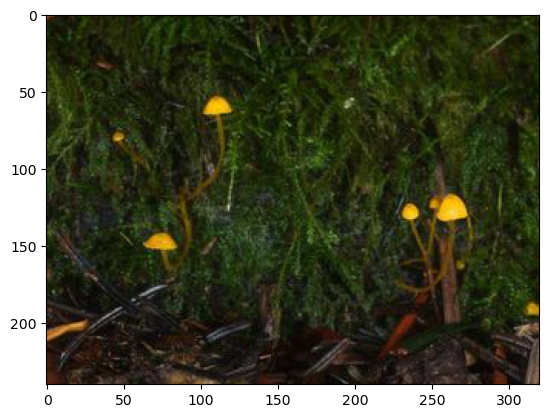

In [101]:
name,urls,urls_img = get_image_name_from_name_id(150)
print(name)
print(urls[0])
image = imageio.imread(urls_img[0])
plt.imshow(image)